In [35]:
!pip install tensorflow

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.get_weights()

[array([[-0.70831287],
        [-0.85082144]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
inp = tf.constant([[1,2]],dtype=tf.float32)
inp

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 2.]], dtype=float32)>

In [41]:
model(inp)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-2.4099557]], dtype=float32)>

In [42]:
(0.4926356 * 1 ) + (-0.78542 *2) + 0

-1.0782044

In [43]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.get_weights()

[array([[-0.9369925],
        [-1.2390428]], dtype=float32),
 array([0.], dtype=float32)]

In [45]:
inp

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 2.]], dtype=float32)>

In [46]:
model(inp)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.03182754]], dtype=float32)>

In [47]:
(1.329177*1) + (2*-0.3974775)

0.5342220000000001

In [48]:
import numpy as np
1/(1+np.exp(-0.5342220000000001))

0.6304672869492736

In [49]:
model = Sequential()
model.add(Dense(units=3, activation='sigmoid', input_shape=(2,), name="hidden_1"))
model.add(Dense(units=1, activation='sigmoid', name='output_layer'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 3)                 9         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
model(inp)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.7285498]], dtype=float32)>

In [52]:
model.layers[0](inp)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.0758655 , 0.06901657, 0.83708566]], dtype=float32)>

In [53]:
model.layers[1](tf.constant([[0.67047316, 0.4465955 , 0.8008245 ]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.7723474]], dtype=float32)>

In [54]:
from tensorflow.keras.datasets.mnist  import load_data

In [55]:
mnist_data = load_data()

In [56]:
(X_train,y_train),(X_test,y_test) = mnist_data

In [57]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [58]:
X_test.shape

(10000, 28, 28)

In [59]:
#Preprocessing
# Convert each data into 1d array
# Perform min max scaling on the image data

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000,28*28)

In [60]:
X_train.max()

255

In [61]:
X_train.min()

0

In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [80]:
X_test.shape

(10000, 784)

In [79]:
model = Sequential()
model.add(Dense(units=30, activation='sigmoid', input_shape=(784,)))
#model.add(Dense(units=30, activation='relu', input_shape=(784,)))
model.add(Dense(units=20, activation='relu')) # hidden layer
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                23550     
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
Total params: 24380 (95.23 KB)
Trainable params: 24380 (95.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='SGD',
             metrics=['acc']) # Loss Function, Optimizer (learning algorithm), metrics

In [66]:
history = model.fit(x=X_train,
         y=y_train,
         validation_data=(X_test,y_test),
         epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 594us/step - loss: 2.2489 - acc: 0.2819 - val_loss: 2.1615 - val_acc: 0.4926
Epoch 2/20
1875/1875 [==============================] - 1s 584us/step - loss: 2.0029 - acc: 0.5292 - val_loss: 1.7873 - val_acc: 0.5608
Epoch 3/20
1875/1875 [==============================] - 1s 552us/step - loss: 1.5563 - acc: 0.6116 - val_loss: 1.3278 - val_acc: 0.6534
Epoch 4/20
1875/1875 [==============================] - 1s 567us/step - loss: 1.1833 - acc: 0.6834 - val_loss: 1.0429 - val_acc: 0.7197
Epoch 5/20
1875/1875 [==============================] - 1s 564us/step - loss: 0.9641 - acc: 0.7399 - val_loss: 0.8726 - val_acc: 0.7753
Epoch 6/20
1875/1875 [==============================] - 1s 581us/step - loss: 0.8230 - acc: 0.7836 - val_loss: 0.7532 - val_acc: 0.8076
Epoch 7/20
1875/1875 [==============================] - 1s 585us/step - loss: 0.7196 - acc: 0.8131 - val_loss: 0.6626 - val_acc: 0.8309
Epoch 8/20
1875/1875 [==========================

In [67]:
h = history.history #dict

In [68]:
h.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [69]:
import matplotlib.pyplot as plt

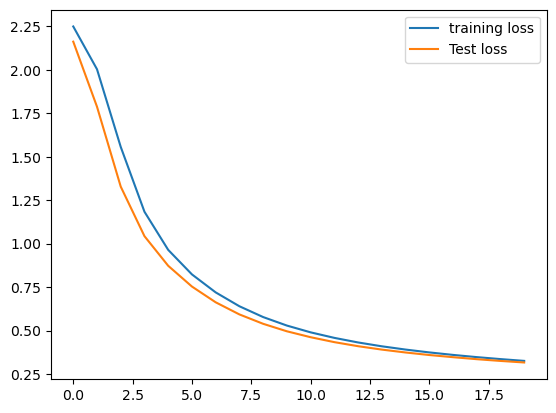

In [71]:
plt.plot(h['loss'], label='training loss')
plt.plot(h['val_loss'], label='Test loss')
plt.legend()
plt.show()

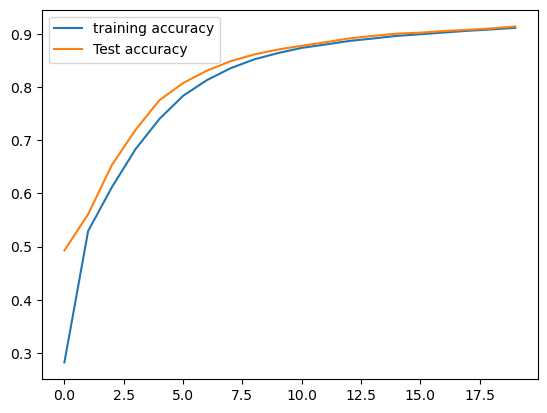

In [72]:
plt.plot(h['acc'], label='training accuracy')
plt.plot(h['val_acc'], label='Test accuracy')
plt.legend()
plt.show()

In [74]:
#new data
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 384us/step


In [75]:
y_pred[0]

array([9.2607152e-06, 9.9004898e-04, 3.3876969e-04, 1.5000413e-02,
       7.5319200e-05, 7.8669656e-04, 1.5903395e-07, 9.7421885e-01,
       3.7325078e-04, 8.2072662e-03], dtype=float32)

In [76]:
np.argmax(y_pred[0])

7

In [77]:
y_test[0]

7

In [78]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 416us/step - loss: 0.3165 - acc: 0.9141


[0.3164551854133606, 0.9140999913215637]